In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
import sys
sys.path.append('..')
import ODE_Dynamics as od

In [2]:
# Equillibrium: (alpha*gamma/beta*c, L/alpha - gamma*mu/beta*c, c*L/alpha*gamma - mu/beta)
# When beta*c*L = alpha*gamma*mu,(L/mu,0,0) is either a saddle point or an asymptotically stable node.
# Otherwise eventually there remain infected cells, virions and uninfected cells in equilibrium.

par=tf.constant(np.array([[5E3,0.01,5E-7,0.5,20,10]], dtype=np.float32))
mod = od.ViralDynamics(par)
V0 = 1E4
X0 = 1E6
Y0 = 1E4
init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,50.0,num=500,dtype=np.float32))


In [3]:
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
print(results.diagnostics)

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of virus particles')
plt.title("Viral Dynamics of 5 Patients")
sample_size = 1
index = 1
mu_b, sigma_b = 5, 1

while index <= sample_size:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par=tf.constant(np.array([[L,0.01,beta*1E-7,0.5,20,10]], dtype=np.float32))
    mod = od.ViralDynamics(par)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state=tf.constant(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_time=tf.constant(0.0)
    soln_times=tf.constant(np.linspace(0.0,50.0,num=100,dtype=np.float32))
    
    dp = tfp.math.ode.DormandPrince()
    results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
    print(results.diagnostics)
    
    t = results.times ; v = results.states[:,0,0] ;
    print("printing v")
    print(v)
    plt.plot(t, v,"r-",linewidth=1)
    
    index +=1
    
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)
printing v
tf.Tensor(
[1.11116528e+03 2.40394751e+03 2.93482446e+03 3.56582690e+03
 4.32081592e+03 5.23373730e+03 6.31748926e+03 7.59551221e+03
 9.14230078e+03 1.09441621e+04 1.30473652e+04 1.55404004e+04
 1.84535000e+04 2.17856738e+04 2.56724375e+04 3.01416562e+04
 3.51617578e+04 4.08368477e+04 4.72671289e+04 5.43072344e+04
 6.19652227e+04 7.03991328e+04 7.92609922e+04 8.84432109e+04
 9.81222500e+04 1.07693828e+05 1.16953953e+05 1.26085984e+05
 1.34280125e+05 1.41399656e+05 1.47632047e+05 1.52174344e+05
 1.55195984e+05 1.56801531e+05 1.56514703e+05 1.54878953e+05
 1.51718469e+05 1.47163422e+05 1.41860062e+05 1.35255016e+05
 1.28218102e+05 1.20906094e+05 1.12759656e+05 1.05070594e+05
 9.72900000e+04 8.9318718

In [8]:
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

printing par
tf.Tensor(
[[5.1433308e-04 9.9999998e-03 4.8606631e-07 5.0000000e-01 2.0000000e+01
  1.0000000e+01]
 [6.1702699e-04 9.9999998e-03 4.0516863e-07 5.0000000e-01 2.0000000e+01
  1.0000000e+01]
 [4.5335398e-04 9.9999998e-03 5.5144551e-07 5.0000000e-01 2.0000000e+01
  1.0000000e+01]
 [6.3731294e-04 9.9999998e-03 3.9227194e-07 5.0000000e-01 2.0000000e+01
  1.0000000e+01]
 [3.7766987e-04 9.9999998e-03 6.6195378e-07 5.0000000e-01 2.0000000e+01
  1.0000000e+01]], shape=(5, 6), dtype=float32)
_DopriDiagnostics(num_ode_fn_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=1602>, num_jacobian_evaluations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, num_matrix_factorizations=<tf.Tensor: shape=(), dtype=int32, numpy=0>, status=<tf.Tensor: shape=(), dtype=int32, numpy=0>)


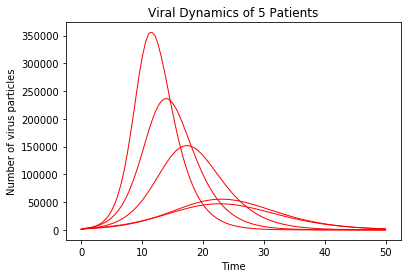

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel('Time')
plt.ylabel('Number of virus particles')
plt.title("Viral Dynamics of 5 Patients")
sample_size = 4
index = 1
mu_b, sigma_b = 5, 1
beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
L = 0.0025/beta
par=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
V0 = np.random.normal(1E3, 1E2, 1)
X0 = 1E6
Y0 = V0
init_state=(np.array([[V0,X0,Y0]], dtype=np.float32))

while index <= sample_size:
    beta = np.random.normal(mu_b, sigma_b, 1)   #"rate at which virus infects host cells"
    L = 0.0025/beta
    par_new=np.array([[L,0.01,beta*1E-7,0.5,20.0,10.0]])
    par = np.concatenate((par, par_new), axis = 0)
    V0 = np.random.normal(1E3, 1E2, 1)
    X0 = 1E6
    Y0 = V0
    init_state_new=(np.array([[V0,X0,Y0]], dtype=np.float32))
    init_state = np.concatenate((init_state, init_state_new), 0)
    
    index +=1

par = tf.constant(par, dtype=tf.float32)
init_state = tf.constant(init_state, dtype=tf.float32)
mod = od.ViralDynamics(par)
init_time=tf.constant(0.0)
soln_times=tf.constant(np.linspace(0.0,50.0,num=100,dtype=np.float32))
    
dp = tfp.math.ode.DormandPrince()
results = dp.solve(mod.RHS, init_time, init_state, solution_times=soln_times)
t = results.times ; v = results.states[...,0] ;
plt.plot(t, v,"r-",linewidth=1)
print(results.diagnostics)
plt.savefig('multiple_viral_dynamic_5.png', dpi=300, bbox_inches='tight')